# Research HW1 by Mukhammadrizo Maribjonov
[Link to watch online](https://colab.research.google.com/drive/1E-F7ZfIYEG1LBx5DbzCV--RPXk7nBjIX)

### Background info

When you're driving with constant speed, even when turning, your tangential acceleration remains constant because your speed isn't changing. However, your normal acceleration increases while turning. Here's why:

Tangential Acceleration: This component of acceleration is parallel to the velocity vector. Since you're maintaining a constant speed, there's no change in the magnitude of your velocity vector along the direction of motion. Hence, tangential acceleration remains constant.

Normal Acceleration: This component of acceleration is perpendicular to the velocity vector, pointing towards the center of curvature of your path. When you're turning, your direction of motion is changing continuously, even if your speed remains constant. This change in direction requires a force towards the center of curvature, resulting in an increase in normal acceleration. The tighter the turn, the greater the change in direction and thus the greater the normal acceleration required.

In summary, while driving with constant speed, the acceleration that increases when turning is the normal acceleration. This increase is necessary to continuously change the direction of your velocity vector as you navigate the curve.

## Task

We have a mobile vehicle, which should survive after the track. We have

some predefined trajectory, which is given in y(x) format — our goal to pass this
trajectory as fast as possible. But at the end of the course, there is a drop-off. It
means that we should stop our machine at the end of the trajectory. We have to
establish some constraints, such as max tangent acceleration (max power on the
motor) and normal (road adhesion). Despite it, the best way is to represent our
robot as a particle. How should we move (speed and acceleration) for solving
such a task?


## Given

$a_{t_{max}} = 2\small{m/s^2}\\
a_{n_{max}} = 3\small{m/s^2}\\
v_{max} = 3\small{m/s}\\
y(x) = Axln(\frac{x}{B}),\\
\text{where } A = 3,\ B = 5, x \text{ exists on } [0\dots4]
$

## To find

$Y(x),\ Y(t),\ v(t),\ a_t(t),\ a_n(t),\ t$

## Solution

To minimise total travel time either $a_t$, $a_n$, or $v$ must equal to it's maximum.
Let's find their relations for each point on the path.

**Tangential Component**: This component is responsible for changes in speed. It accounts for the tangential acceleration.

**Normal Component**: This component is responsible for changes in direction. It accounts for the normal acceleration.

In fact at any point on the path we are only limited by $a_n$ and $v$ notice that $a_n ∼ v^2$, while $a_{\tau}$ shows how fast we can change $v$.

$a_n = \frac{v^2}{r}$, where $r(x) = \left| \frac{\left(1+y(x)^{\prime\ 2}\right)^\frac{2}{3}}{y(x)^{\prime\prime}} \right|$ is a radius of curvature at point $x$.

From this we can derive 2 constraints for $v$:
$
\begin{cases}
a_n \le 3 \small{m/s^2};\\
v \le 3 \small{m/s};
\end{cases}
$
$$
\begin{cases}
v^2 / r \le 3 \small{m/s^2};\\
v \le 3 \small{m/s};
\end{cases}
\\
\begin{cases}
v \le \sqrt{ a_{t_{max}} * \left| \frac{\left(1+y(x)^{\prime\ 2}\right)^\frac{2}{3}}{y(x)^{\prime\prime}} \right|};\\
v \le v_{max};
\end{cases}
$$

* $y(x) = 3xln(\frac{x}{5})$
* $\dot y(x) = 3ln(x) - 3ln(5) + 3$
* $\ddot y(x) = \frac{3}{x}$

### Let's Plot this values

#### Imports

In [240]:
%pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import animation
from scipy.integrate import quad
import pandas as pd

Note: you may need to restart the kernel to use updated packages.


#### Plotting

In [241]:
ATMAX = 2
ANMAX = 3
VMAX = 3
XMIN = 0
XMAX = 4
dx = 0.0001

In [242]:
x = np.linspace(XMIN, XMAX, 1000)
y = lambda x: 3*x*np.log(x/5)
dy = lambda x: 3*np.log(x) - 3 * np.log(5) + 3
ddy = lambda x: 3/x

# natural form
sigma = np.array([quad(lambda x: np.sqrt(1 + (dy(x)) ** 2), XMIN, x)[0] for x in x])
dsigma = np.gradient(sigma, x)
ddsigma = np.gradient(dsigma, x)

curvature = np.abs(ddy(x)) / ((1 + dy(x) ** 2) ** (3 / 2))

/tmp/ipykernel_85018/1548475892.py:3: RuntimeWarning: divide by zero encountered in log
  dy = lambda x: 3*np.log(x) - 3 * np.log(5) + 3
/tmp/ipykernel_85018/1548475892.py:7: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  sigma = np.array([quad(lambda x: np.sqrt(1 + (dy(x)) ** 2), XMIN, x)[0] for x in x])


/tmp/ipykernel_85018/1548475892.py:4: RuntimeWarning: divide by zero encountered in divide
  ddy = lambda x: 3/x
/tmp/ipykernel_85018/1548475892.py:11: RuntimeWarning: invalid value encountered in divide
  curvature = np.abs(ddy(x)) / ((1 + dy(x) ** 2) ** (3 / 2))


/tmp/ipykernel_85018/1548475892.py:2: RuntimeWarning: divide by zero encountered in log
  y = lambda x: 3*x*np.log(x/5)
/tmp/ipykernel_85018/1548475892.py:2: RuntimeWarning: invalid value encountered in multiply
  y = lambda x: 3*x*np.log(x/5)


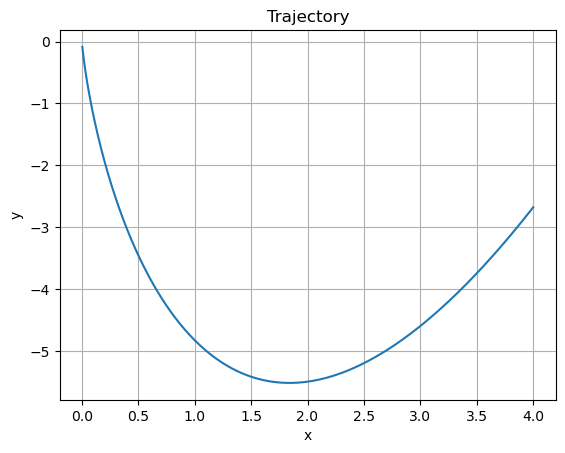

In [243]:
# draw trajectory on a plane

plt.grid()

plt.plot(x, y(x))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trajectory")
plt.savefig("trajectory.png")


9.80316612025513

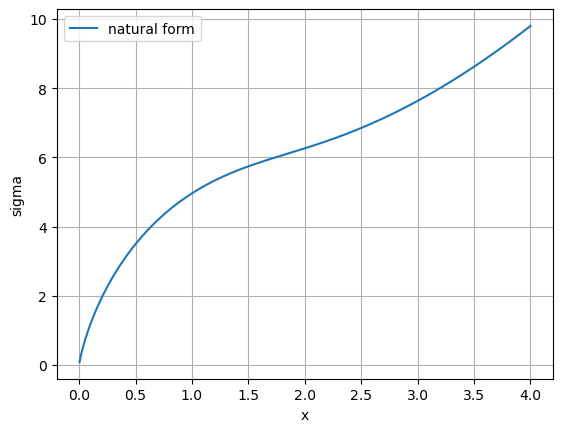

In [244]:
# show sigma by x

plt.grid()
plt.plot(x, sigma, label="natural form")
plt.xlabel("x")
plt.ylabel("sigma")

plt.legend()

sigma[-1]


Text(0.5, 1.0, 'Curvature')

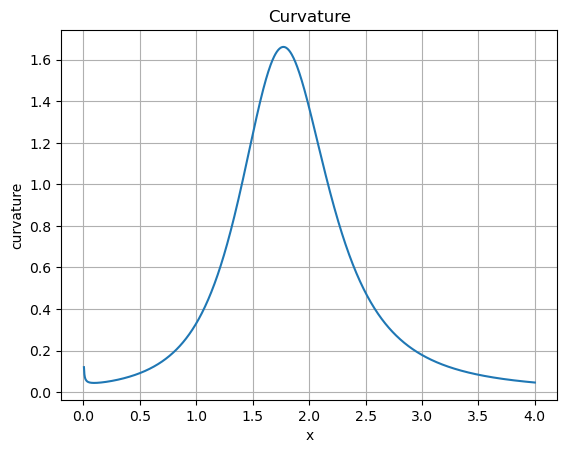

In [245]:
# let's find what is curvature at the each x

plt.grid()
plt.plot(x, curvature)
plt.xlabel("x")
plt.ylabel("curvature")
plt.title("Curvature")

Imagine we move with constant speed all the time, $v_{max} = 3$. How $a_n$ would look like in that case depending on cuvature $k(x)$?

$a_n(x) = k(x) \cdot v_{max}^2$, where $v_{max} = 3$

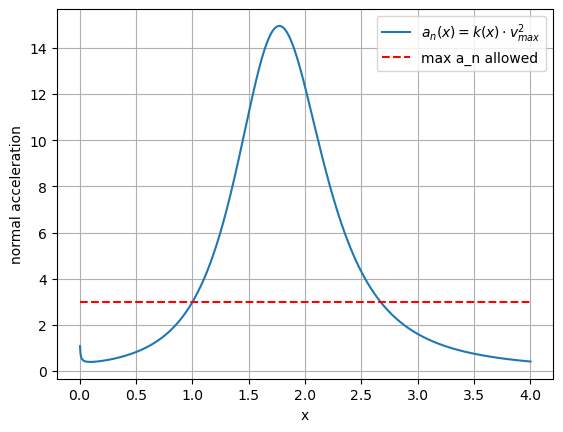

In [246]:
plt.grid()
plt.plot(x, curvature * VMAX**2, label='$a_n(x) = k(x) \cdot v_{max}^2$')
plt.hlines(
    ANMAX,
    XMIN,
    XMAX,
    colors="red",
    linestyles="dashed",
    label="max a_n allowed",
)
plt.xlabel("x")
plt.ylabel("normal acceleration")
plt.legend()

plt.savefig("normal_acceleration_lim.png")


As we see that $a_n$ exeeds the allowed $3$ at turning points. It is exceeding because to provide constant speed of $v_{max} = 3$ in turning points, we need more $a_n$. To provide a constant speed of $v_{max} = 3$ at turning points we have to increase $a_n$. But we can't have $a_n > 3$. In order to not to exceed the limit, we need to slow down in turning point, such that we have $a_n = 3$

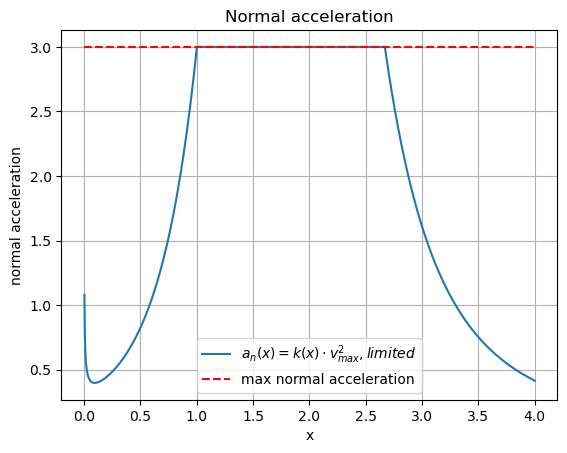

In [247]:
# set maximum available normal acceleration

accnmax = np.clip(curvature * VMAX**2, a_min=None, a_max=ANMAX)

plt.grid()
plt.plot(x, accnmax, label='$a_n(x) = k(x) \cdot v_{max}^2, limited$')
plt.hlines(
    ANMAX,
    XMIN,
    XMAX,
    colors="red",
    linestyles="dashed",
    label="max normal acceleration",
)
plt.xlabel("x")
plt.ylabel("normal acceleration")
plt.title("Normal acceleration")
plt.legend()

Now we have allowed $a_n$. Now as $a_n$ is related to $v$, at each point along $x$, we can compute $v$.

/tmp/ipykernel_85018/1548475892.py:2: RuntimeWarning: divide by zero encountered in log
  y = lambda x: 3*x*np.log(x/5)
/tmp/ipykernel_85018/1548475892.py:2: RuntimeWarning: invalid value encountered in multiply
  y = lambda x: 3*x*np.log(x/5)


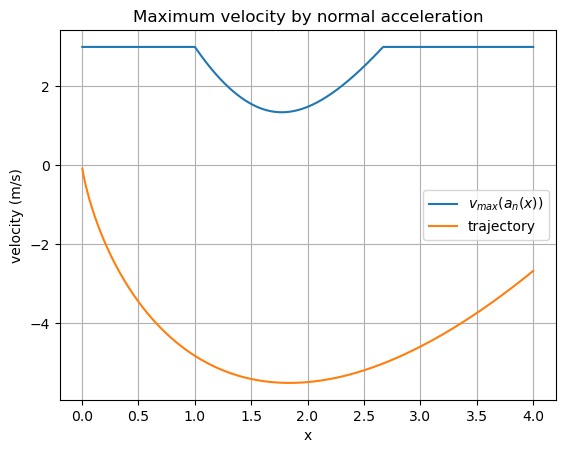

In [248]:
# compute maximum available velocity through the each point depending the normal acceleration

vmax_n = np.sqrt(accnmax / curvature)

plt.grid()
plt.plot(x, vmax_n, label="$v_{max} (a_n(x))$")
plt.plot(x, y(x), label="trajectory")

plt.xlabel("x")
plt.ylabel("velocity (m/s)")
plt.title("Maximum velocity by normal acceleration")

plt.legend()
plt.savefig("velocity_by_normal_acceleration.png")

/tmp/ipykernel_85018/1548475892.py:3: RuntimeWarning: divide by zero encountered in log
  dy = lambda x: 3*np.log(x) - 3 * np.log(5) + 3


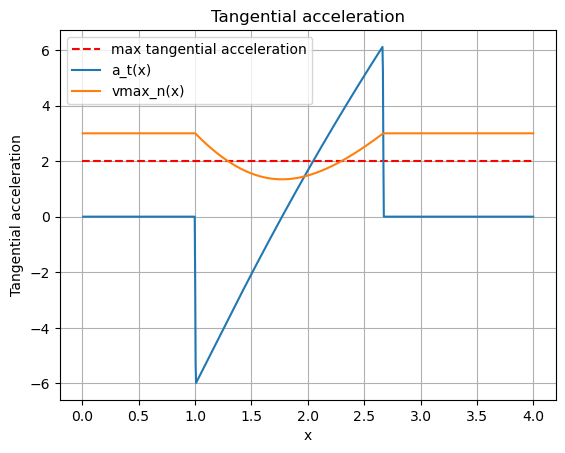

In [249]:
dv_dx = np.gradient(vmax_n, x)
dy_values = dy(x)

a_t = dv_dx * vmax_n / np.sqrt(1 + dy_values**2)

plt.hlines(
    ATMAX,
    XMIN,
    XMAX,
    colors="red",
    linestyles="dashed",
    label="max tangential acceleration",
)
plt.plot(x, a_t, label='a_t(x)')
plt.plot(x, vmax_n, label='vmax_n(x)')
plt.xlabel("x")
plt.ylabel("Tangential acceleration")
plt.title("Tangential acceleration")
plt.legend()
plt.grid()

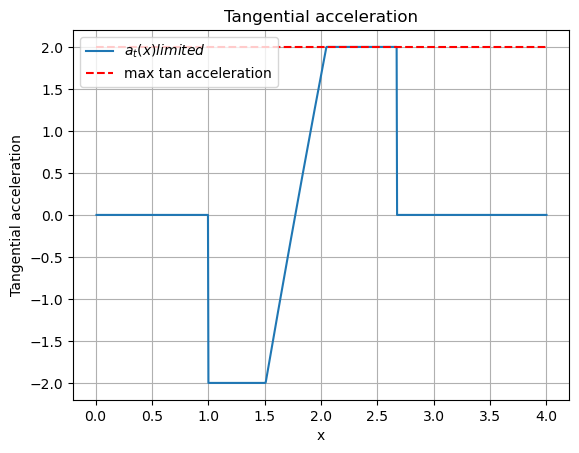

In [250]:
acc_t_max = np.clip(dv_dx * vmax_n / np.sqrt(1 + dy_values**2), a_min=-ATMAX, a_max=ATMAX)
plt.grid()
plt.plot(x, acc_t_max, label='$a_t(x) limited$')
plt.hlines(
    ATMAX,
    XMIN,
    XMAX,
    colors="red",
    linestyles="dashed",
    label="max tan acceleration",
)
plt.xlabel("x")
plt.ylabel("Tangential acceleration")
plt.title("Tangential acceleration")
plt.legend()

x to start deceleration 2.8916544301166605


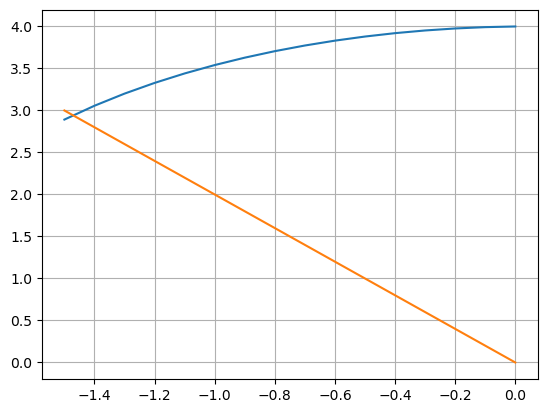

In [255]:
# estimate deceleration

xs = [XMAX]
time = [0]
vs = [0]

dt = 0.1
while vs[-1] < VMAX:
    last_x = xs[-1]
    last_v = vs[-1]

    dv = ATMAX * dt
    v = last_v + dv
    vs.append(v)

    time.append(time[-1] - dt)
    xs.append(last_x - v * dt / np.sqrt(1 + dy(last_x) ** 2))

plt.grid()
plt.plot(time, xs, label="trajectory")
plt.plot(time, vs, label="velocity")

TIME_DEC = xs[-1]
print(f"x to start deceleration {TIME_DEC}")

In [257]:
from dataclasses import dataclass
from typing import Optional


@dataclass
class Trace:
    a_tan: float
    v: float
    dt: float
    t: float
    prev: "Trace" = None

    last_x_val: Optional[float] = None

    @property
    def vc(self):
        return np.clip(self.v, 0, VMAX)

    @property
    def last_x(self):
        if self.last_x_val:
            return self.last_x_val

        if self.prev is None:
            return 0
        self.last_x_val = self.prev.x

        return self.last_x_val

    @property
    def dx(self):
        return self.v * self.dt / np.sqrt(1 + dy(self.last_x) ** 2)

    @property
    def x(self):
        return np.clip(self.last_x + self.dx, XMIN, XMAX)

    @property
    def curvature(self):
        return curvature[int(self.x / XMAX * (len(curvature) - 1))]
        return np.abs(ddy(self.x)) / (1 + dy(self.x) ** 2) ** (3 / 2)

    @property
    def a_norm(self):
        return accnmax[int(self.x / XMAX * (len(accnmax) - 1))]
        return self.curvature * self.v**2
        return np.clip(self.v**2 * self.curvature, -ANMAX, ANMAX)

    @property
    def y(self):
        return y(self.x)


traces = [Trace(ATMAX, 0, 0, 0, None)]


dt = 0.1
# for i, v in enumerate(v_int[:-1]):
while traces[-1].v <= VMAX:
    new = Trace(ATMAX, traces[-1].v + ATMAX * dt, dt, traces[-1].t + dt, traces[-1])
    traces.append(new)

while traces[-1].x < TIME_DEC:
    last_x = traces[-1].x

    at = acct[int(last_x / x[-1] * len(x))]
    v = vmax[int(last_x / x[-1] * len(x))]

    new = Trace(at, v, dt, traces[-1].t + dt, traces[-1])
    traces.append(new)

# we decelerate

while traces[-1].v > 0:
    new = Trace(-ATMAX, traces[-1].v - ATMAX * dt, dt, traces[-1].t + dt, traces[-1])
    traces.append(new)

time = [t.t for t in traces]
ats = [t.a_tan for t in traces]
ans = [t.a_norm for t in traces]
vel = [t.vc for t in traces]
xpos = [t.x for t in traces]
ypos = [t.y for t in traces]

fig, axs = plt.subplots(3, 1, figsize=(20, 10))

axs[0].grid()
axs[0].plot(time, ats, label="tangential acceleration")
axs[0].plot(time, ans, label="normal acceleration")
axs[0].set_xlabel("time (s)")
axs[0].set_ylabel("acceleration (m/s^2)")
axs[0].legend()

axs[1].grid()
axs[1].plot(time, xpos, label="x")
axs[1].plot(time, ypos, label="y")
axs[1].legend()
axs[1].set_xlabel("time (s)")
axs[1].set_ylabel("position (m)")
axs[1].set_xlabel("time")

axs[2].grid()
axs[2].plot(time, vel, label="velocity")
axs[2].legend()
axs[2].set_xlabel("time")
axs[2].set_ylabel("velocity (m/s)")

print(f"the last time {time[-1]}")

plt.savefig("result.png")

/tmp/ipykernel_85018/1548475892.py:3: RuntimeWarning: divide by zero encountered in log
  dy = lambda x: 3*np.log(x) - 3 * np.log(5) + 3


ValueError: cannot convert float NaN to integer

From the graph, we see that we slow down in turning points. That blue graph, is maximum velocity $v_{max}$ that we can go through the trajectory without exceeding $a_n$. However, this is not the end. Now we are not moving with constant velcity. At some points we are slowing down (Changing the values of velcotiy). $a_t$ is responsible for the change of the value of velcotiy, and it is also limited. If you have a limitation on $a_t$, it means there's a maximum rate at which you can change your speed while driving. In our case it is $a_t = 2$.

/tmp/ipykernel_85018/1548475892.py:3: RuntimeWarning: divide by zero encountered in log
  dy = lambda x: 3*np.log(x) - 3 * np.log(5) + 3


too fast change of velocity v1: 1.5385135835974304 v2: 1.5439795457220908 dv: 0.005454414429070062, x: 2.05005005005005
too fast change of velocity v1: 1.5439679980265004 v2: 1.5495124999613687 dv: 0.005444337392620203, x: 2.054054054054054
too fast change of velocity v1: 1.5494123354191207 v2: 1.555112075381301 dv: 0.005434231932761571, x: 2.058058058058058
too fast change of velocity v1: 1.5548465673518823 v2: 1.5607779015073737 dv: 0.0054240993458992606, x: 2.062062062062062
too fast change of velocity v1: 1.5602706666977815 v2: 1.5665096083850054 dv: 0.005413940913499238, x: 2.066066066066066
too fast change of velocity v1: 1.5656846076112807 v2: 1.572306826638542 dv: 0.005403757901822378, x: 2.07007007007007
too fast change of velocity v1: 1.5710883655131032 v2: 1.57816918752875 dv: 0.0053935515616659255, x: 2.074074074074074
too fast change of velocity v1: 1.576481917074769 v2: 1.5840963230088243 dv: 0.005383323128132989, x: 2.078078078078078
too fast change of velocity v1: 1.581

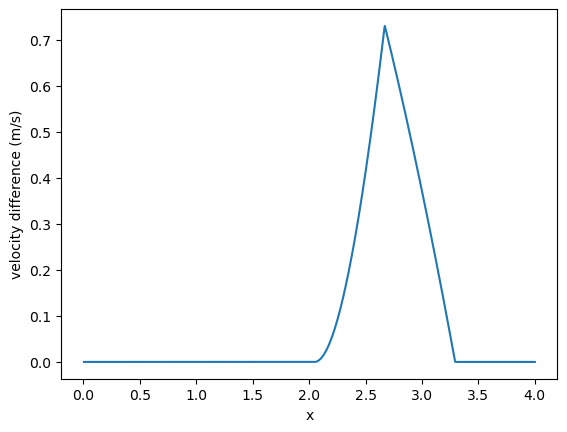

In [252]:
# validate that we do not change velocity too fast

dx_sigmas = []

dvmax_n = np.gradient(vmax_n, x)

vmax = [vmax_n[0]]

for i0, i1 in zip(range(len(vmax_n) - 1), range(1, len(vmax_n))):
    dx_sigma = np.sqrt(1 + dy(x[i0]) ** 2)
    dx_vmax_n = dvmax_n[i0]
    dx = x[i1] - x[i0]

    max_dv = ATMAX * dx_sigma * dx / np.average([vmax_n[i0], vmax_n[i1]])
    max_dv2 = -ATMAX * dx_sigma * dx / np.average([vmax_n[i0], vmax_n[i1]])
    if vmax[-1] + max_dv < vmax_n[i1]:
        print(
            f"too fast change of velocity v1: {vmax[-1]} v2: {vmax_n[i1]} dv: {max_dv}, x: {x[i1]}"
        )
        vmax.append(vmax[-1] + max_dv)
    else:
        vmax.append(vmax_n[i1])

    dx_sigmas.append(dx_sigma)
    
vmax = np.array(vmax)

dif = pd.DataFrame(data={"vmax_n_diff": vmax_n - vmax})

plt.plot(x, dif["vmax_n_diff"].values)
plt.xlabel("x")
plt.ylabel("velocity difference (m/s)")

plt.savefig("veldiff.png")


Now we have $v_max(x)$ which is fully within given $a_t$ and $a_n$ constraints.

(nan, nan)

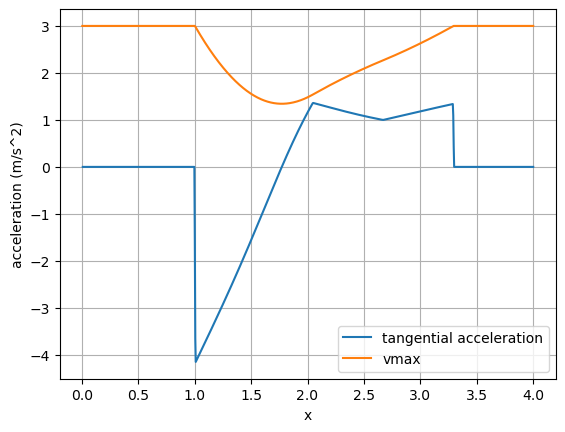

In [155]:
# compute tangential acceleration needed for velocity

acct = np.gradient(vmax, x)

plt.grid()
plt.plot(x, acct, label="tangential acceleration")
plt.plot(x, vmax, label="vmax")
plt.xlabel("x")
plt.ylabel("acceleration (m/s^2)")
plt.legend()

plt.savefig("acctan_x.png")
np.min(acct), np.max(acct)


x to start deceleration 2.9507804540286915


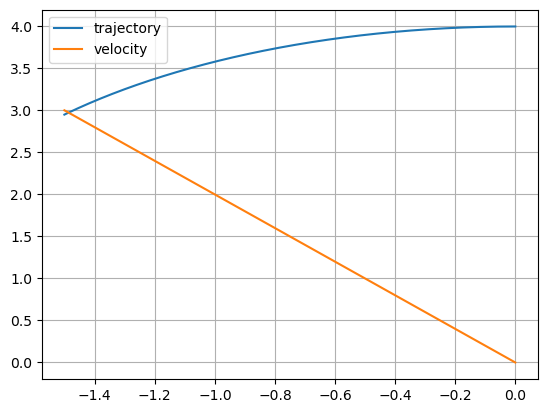

In [145]:
# estimate deceleration

xs = [XMAX]
time = [0]
vs = [0]

dt = 0.001
while vs[-1] < VMAX:
    last_x = xs[-1]
    last_v = vs[-1]

    dv = ATMAX * dt
    v = last_v + dv
    vs.append(v)

    time.append(time[-1] - dt)
    xs.append(last_x - v * dt / np.sqrt(1 + dy(last_x) ** 2))

plt.grid()
plt.plot(time, xs, label="trajectory")
plt.plot(time, vs, label="velocity")
plt.legend()

TIME_DEC = xs[-1]
print(f"x to start deceleration {TIME_DEC}")

[Trace(a_tan=2, v=0, dt=0, t=0, prev=None, last_x_val=None), Trace(a_tan=2, v=0.2, dt=0.1, t=0.1, prev=Trace(a_tan=2, v=0, dt=0, t=0, prev=None, last_x_val=None), last_x_val=None), Trace(a_tan=2, v=0.4, dt=0.1, t=0.2, prev=Trace(a_tan=2, v=0.2, dt=0.1, t=0.1, prev=Trace(a_tan=2, v=0, dt=0, t=0, prev=None, last_x_val=None), last_x_val=None), last_x_val=None), Trace(a_tan=2, v=0.6000000000000001, dt=0.1, t=0.30000000000000004, prev=Trace(a_tan=2, v=0.4, dt=0.1, t=0.2, prev=Trace(a_tan=2, v=0.2, dt=0.1, t=0.1, prev=Trace(a_tan=2, v=0, dt=0, t=0, prev=None, last_x_val=None), last_x_val=None), last_x_val=None), last_x_val=None), Trace(a_tan=2, v=0.8, dt=0.1, t=0.4, prev=Trace(a_tan=2, v=0.6000000000000001, dt=0.1, t=0.30000000000000004, prev=Trace(a_tan=2, v=0.4, dt=0.1, t=0.2, prev=Trace(a_tan=2, v=0.2, dt=0.1, t=0.1, prev=Trace(a_tan=2, v=0, dt=0, t=0, prev=None, last_x_val=None), last_x_val=None), last_x_val=None), last_x_val=None), last_x_val=None), Trace(a_tan=2, v=1.0, dt=0.1, t=0.5, 

/tmp/ipykernel_85018/1548475892.py:3: RuntimeWarning: divide by zero encountered in log
  dy = lambda x: 3*np.log(x) - 3 * np.log(5) + 3
/tmp/ipykernel_85018/1548475892.py:2: RuntimeWarning: divide by zero encountered in log
  y = lambda x: 3*x*np.log(x/5)
/tmp/ipykernel_85018/1548475892.py:2: RuntimeWarning: invalid value encountered in scalar multiply
  y = lambda x: 3*x*np.log(x/5)


the last time 1.6000000000000003


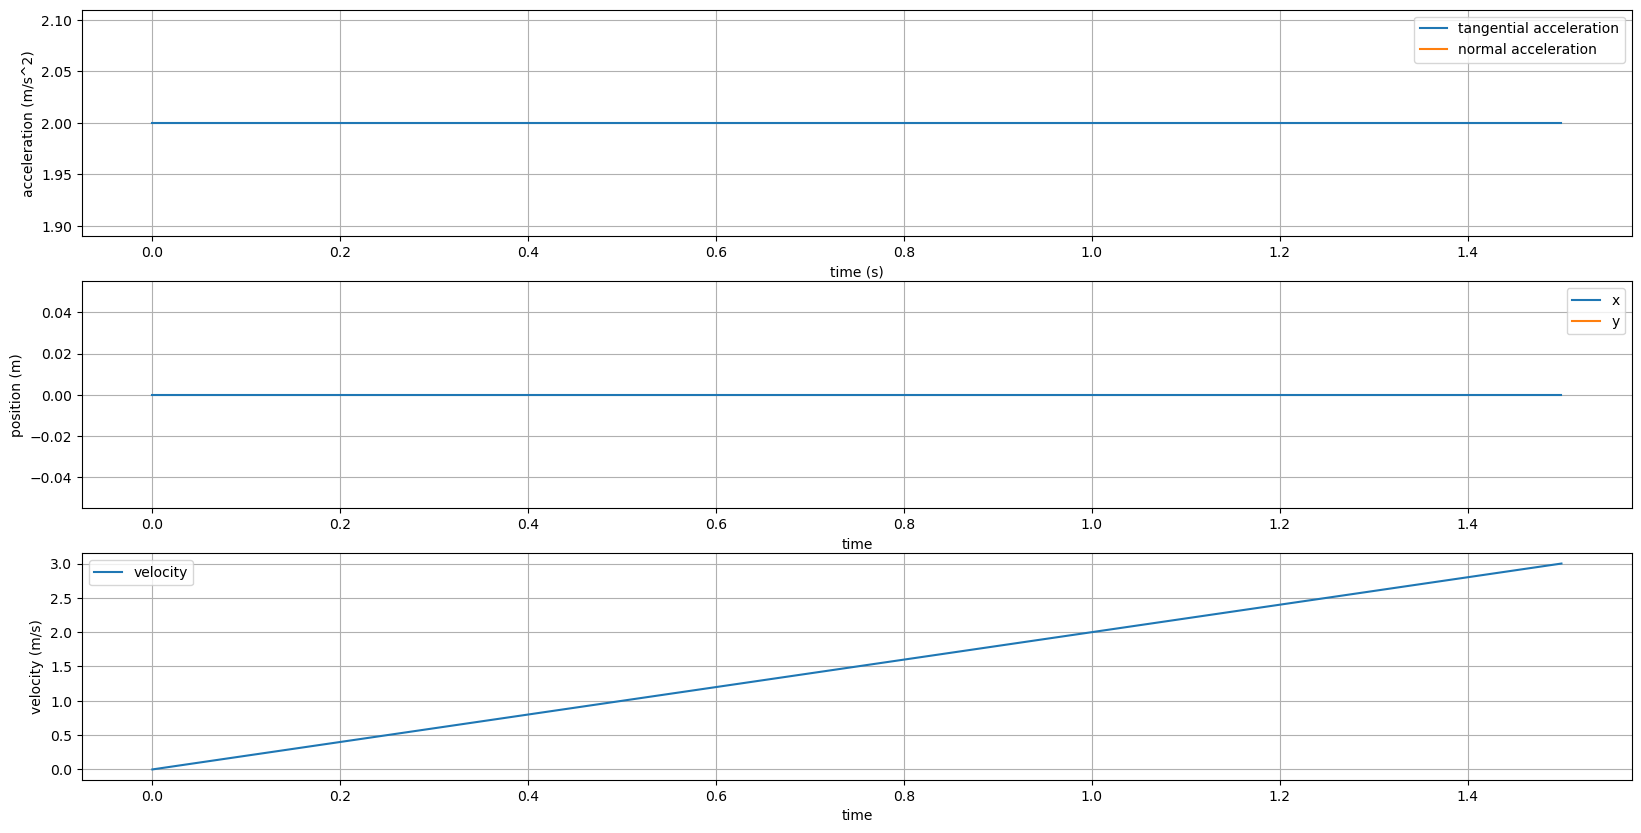

In [271]:


from dataclasses import dataclass
from typing import Optional


@dataclass
class Trace:
    a_tan: float
    v: float
    dt: float
    t: float
    prev: "Trace" = None

    last_x_val: Optional[float] = None

    @property
    def vc(self):
        return np.clip(self.v, 0, VMAX)

    @property
    def last_x(self):
        if self.last_x_val:
            return self.last_x_val

        if self.prev is None:
            return 0
        self.last_x_val = self.prev.x

        return self.last_x_val

    @property
    def dx(self):
        return self.v * self.dt / np.sqrt(1 + dy(self.last_x) ** 2)

    @property
    def x(self):
        return np.clip(self.last_x + self.dx, XMIN, XMAX)

    @property
    def curvature(self):
        return curvature[int(self.x / XMAX * (len(curvature) - 1))]
        return np.abs(ddy(self.x)) / (1 + dy(self.x) ** 2) ** (3 / 2)

    @property
    def a_norm(self):
        if self.x != self.x:
            return accnmax[0]
        return accnmax[int(self.x / XMAX * (len(accnmax) - 1))]
        return self.curvature * self.v**2
        return np.clip(self.v**2 * self.curvature, -ANMAX, ANMAX)

    @property
    def y(self):
        return y(self.x)


traces = [Trace(ATMAX, 0, 0, 0, None)]


dt = 0.1
# for i, v in enumerate(v_int[:-1]):
while traces[-1].v <= VMAX:
    new = Trace(ATMAX, traces[-1].v + ATMAX * dt, dt, traces[-1].t + dt, traces[-1])
    traces.append(new)
    
    
while traces[-1].x < TIME_DEC:
    last_x = traces[-1].x

    at = acct[int(last_x / x[-1] * len(x))]
    v = vmax[int(last_x / x[-1] * len(x))]

    new = Trace(at, v, dt, traces[-1].t + dt, traces[-1])
    traces.append(new)

# we decelerate

while traces[-1].v > 0:
    new = Trace(-ATMAX, traces[-1].v - ATMAX * dt, dt, traces[-1].t + dt, traces[-1])
    traces.append(new)

time = [t.t for t in traces]
ats = [t.a_tan for t in traces]

ans = [t.a_norm for t in traces]

vel = [t.vc for t in traces]
xpos = [t.x for t in traces]
ypos = [t.y for t in traces]

fig, axs = plt.subplots(3, 1, figsize=(20, 10))

axs[0].grid()
axs[0].plot(time, ats, label="tangential acceleration")
axs[0].plot(time, ans, label="normal acceleration")
axs[0].set_xlabel("time (s)")
axs[0].set_ylabel("acceleration (m/s^2)")
axs[0].legend()

axs[1].grid()
axs[1].plot(time, xpos, label="x")
axs[1].plot(time, ypos, label="y")
axs[1].legend()
axs[1].set_xlabel("time (s)")
axs[1].set_ylabel("position (m)")
axs[1].set_xlabel("time")

axs[2].grid()
axs[2].plot(time, vel, label="velocity")
axs[2].legend()
axs[2].set_xlabel("time")
axs[2].set_ylabel("velocity (m/s)")

print(f"the last time {time[-1]}")

plt.savefig("result.png")

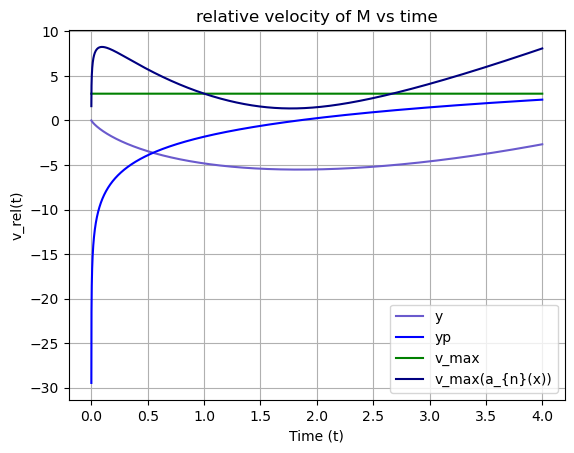

In [36]:
# plt.figure(figsize=(10, 10))

plt.xlabel('Time (t)')
plt.ylabel('v_rel(t)')

plt.plot(X, Y, label='y', color="slateblue")
plt.plot(X, Yp, label='yp', color="blue")
plt.plot(X, [v_max]*len(X), label='v_max', color="green")
plt.plot(X, np.sqrt(an_max*R), label='v_max(a_{n}(x))', color="navy")

plt.title('relative velocity of M vs time')

plt.legend()
plt.grid(True)

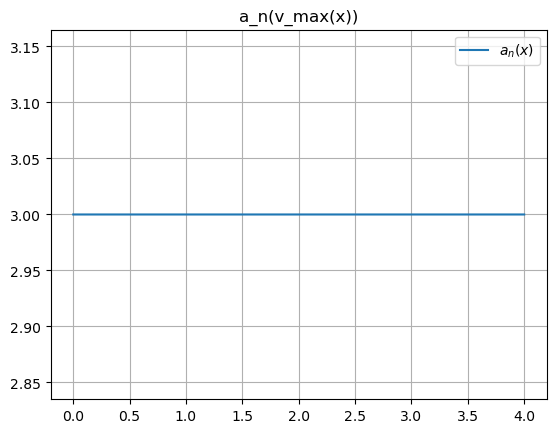

In [57]:
a_n = (v_max**2) * 1/R
plt.title("a_n(v_max(x))")
plt.plot(X, a_n, label=r'$a_n(x)$')
plt.legend()
plt.grid(True)

#### Plot analysis

As wee can see $a_{n_{max}}$ only limits speed on the turns. Which was expected to happen since tighter turns lead to higher $a_n$, therefore we need to drop the speed to not hit the limit of $a_n$.

In [37]:
V = [min(v_max, np.sqrt(an_max*r)) for r in R]

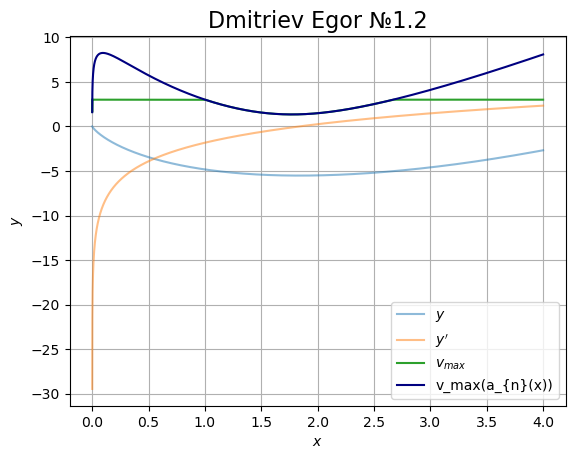

In [42]:
plt.title("Dmitriev Egor №1.2", fontsize=16)

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

# plt.axhline(y=0, color='k')
# plt.axhline(y=an_max, color='k', alpha=0.5)
# plt.axhline(y=-an_max, color='k', alpha=0.5)

plt.plot(X, Y, alpha=0.5, label=r'$y$')
plt.plot(X, Yp, alpha=0.5, label=r'$y^\prime$')
plt.plot(X, V, label=r'$v_{max}$')
plt.plot(X, np.sqrt(an_max*R), label='v_max(a_{n}(x))', color="navy")
plt.legend()
plt.grid(True)

That is the max speed with which we can travel at any point $x$. Now let's take start and finish into account. We chould have $v=0$ at those points. Since further calucations include devision by $v$ let's set $v$ to very small number and not actual zero.

In [43]:
V[0] = 1e-5
V[-1] = 1e-5

Now we need to apply limits on $a_t$

$a_t = \frac{dv}{dt} = \frac{dv}{dx}*\frac{dx}{d\sigma}*\frac{d\sigma}{dt} = \frac{dv}{dx}*\frac{dx}{d\sigma}*v$

$\frac{d\sigma}{dx} = \frac{\sqrt{dx^2+dy^2}}{dx} = \sqrt{1+\frac{dy}{dx}^2}$

$a_t = \frac{dv}{dx}*\frac{1}{\sqrt{1+\frac{dy}{dx}^2}}*v$

$dv = a_t\frac{\sqrt{1+\frac{dy}{dx}^2}}{v}dx$

Let's firt plot $a_t$ (purple) with our current velocities

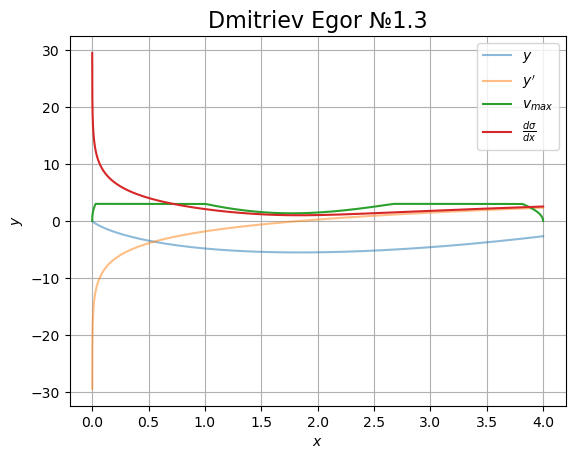

In [55]:
plt.title("Dmitriev Egor №1.3", fontsize=16)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.plot(X, Y, alpha=0.5, label=r'$y$')
plt.plot(X, Yp, alpha=0.5, label=r'$y^\prime$')
plt.plot(X, V, label=r'$v_{max}$')
plt.plot(X, np.sqrt(1+Yp**2), label=r'$\frac{d\sigma}{dx}$')
# plt.plot(X, np.gradient(V, X)*V/np.sqrt(1+Yp**2), label=r'$a_t$')
plt.legend()
plt.grid(True)

As we can see $a_t$ goes out of berders only at hte start and the finish. To fix that we need to flatten the curve of $v$. SInce we can not increase $v$ we need to reduce $v$ at those points.

$dv = a_t\frac{\sqrt{1+\frac{dy}{dx}^2}}{v}dx$

$v*v_x^\prime = a_t\sqrt{1+y_x^{\prime\ 2}}$

$v_x^\prime = \frac{a_t}{v}\sqrt{1+y_x^{\prime\ 2}}$

$\frac{dv}{dx} = \frac{a_t}{v}\sqrt{1+y_x^{\prime\ 2}}$

Now we need to go discrete:

$\frac{v_i - v_{(i-1)}}{dx} = \frac{a_t}{v_i}\sqrt{1+y_x^{\prime\ 2}}$

$v_i = v_{(i-1)} + a_t\sqrt{1+y_x^{\prime\ 2}}dx/v_i$

Wrom this we need to find $v_i$. Leave solving it to the solver.

In [51]:
from sympy.solvers import solve
from sympy import Symbol

k = Symbol('k')

# print("acc_max")
for i in range(1, len(V)):
  kv = solve(V[i-1] + acc_max*np.sqrt(1+yp(X[i])**2)*dx/k - k, k)
  # print(kv)
  if len(kv) != 0 and V[i] > kv[-1]:
    V[i] = kv[-1]
    # print(X[i], ": ", V[i])

# print("brk_max")
for i in range(len(V)-1, 0, -1):
  kv = solve(V[i] + brk_max*np.sqrt(1+yp(X[i-1])**2)*dx/k - k, k)
  # print(kv)
  if len(kv) != 0 and V[i-1] > kv[-1]:
    V[i-1] = kv[-1]
    # print(X[i-1], ": ", V[i-1])


fig = plt.figure(figsize=(21,8))
fig.suptitle("Dmitriev Egor №1.3", fontsize=16)
ax1 = plt.subplot(1,1,1)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
ax1.axhline(y=0, color='k')
ax1.axhline(y=acc_max, color='g', alpha=0.5)
ax1.axhline(y=-brk_max, color='g', alpha=0.5)
ax1.axhline(y=an_max, color='b', alpha=0.5)
ax1.axhline(y=-an_max, color='b', alpha=0.5)
# ax1.set_ylim(-10, 10)

ax1.plot(X, np.gradient(V, X)*V/np.sqrt(1+Yp**2), color='g', label=r'$a_t$')
ax1.plot(X, np.power(V,2)/R, color='b', label=r'$a_n$')
ax1.plot(X, Y, alpha=0.5, label=r'$y$')
ax1.plot(X, V, color='goldenrod', label=r'$v$')
ax1.legend()

KeyboardInterrupt: 

The final time $t$ is:

$t=\int^4_0\frac{\sigma^{\prime}_x}{v}$

$t=\int^4_0\frac{\sqrt{1+y^{\prime\ 2}}}{v}dx$

In [ ]:
print(np.trapz(np.sqrt(1+np.power(Yp[1:-1],2))/V[1:-1], dx=dx))

The final time is $\underline{t = 6.57716187517286}$